In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Adidas US Sales Datasets.xlsx")
print(df.head())

   Unnamed: 0   Unnamed: 1             Unnamed: 2           Unnamed: 3  \
0         NaN          NaN  Adidas Sales Database                  NaN   
1         NaN          NaN                    NaN                  NaN   
2         NaN          NaN                    NaN                  NaN   
3         NaN     Retailer            Retailer ID         Invoice Date   
4         NaN  Foot Locker                1185732  2020-01-01 00:00:00   

  Unnamed: 4 Unnamed: 5 Unnamed: 6             Unnamed: 7      Unnamed: 8  \
0        NaN        NaN        NaN                    NaN             NaN   
1        NaN        NaN        NaN                    NaN             NaN   
2        NaN        NaN        NaN                    NaN             NaN   
3     Region      State       City                Product  Price per Unit   
4  Northeast   New York   New York  Men's Street Footwear              50   

   Unnamed: 9  Unnamed: 10       Unnamed: 11       Unnamed: 12   Unnamed: 13  
0         NaN

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9652 entries, 0 to 9651
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   9649 non-null   object 
 2   Unnamed: 2   9650 non-null   object 
 3   Unnamed: 3   9649 non-null   object 
 4   Unnamed: 4   9649 non-null   object 
 5   Unnamed: 5   9649 non-null   object 
 6   Unnamed: 6   9649 non-null   object 
 7   Unnamed: 7   9649 non-null   object 
 8   Unnamed: 8   9649 non-null   object 
 9   Unnamed: 9   9649 non-null   object 
 10  Unnamed: 10  9649 non-null   object 
 11  Unnamed: 11  9649 non-null   object 
 12  Unnamed: 12  9649 non-null   object 
 13  Unnamed: 13  9649 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


In [4]:
#CLeaning Data set
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df = df.drop(labels=[0,1,2], axis=0)

In [6]:
df.columns = df.iloc[0]

In [7]:
df = df.drop(labels=3, axis=0)

In [8]:
df = df.reset_index(drop=True)

In [9]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [11]:
df.describe()

C:\Users\Ronel O. Parami\AppData\Local\Temp\ipykernel_11208\3627053830.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df.describe()


3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648.00,9648
unique,6,4,724,5,50,52,6,146,361,3512,6510,127.00,3
top,Foot Locker,1185732,2021-01-17 00:00:00,West,California,Portland,Men's Street Footwear,50,225,100000,21000,0.35,Online
freq,2637,5265,77,2448,432,360,1610,557,207,52,34,1229.00,4889


In [12]:
#Analysis
#Top Products

top_products = (
    df[['Product', 'Total Sales']]
    .groupby('Product')
    .sum()
    .sort_values(by='Total Sales', ascending = False)
)


top_products

3,Total Sales
Product,
Men's Street Footwear,208826244.0
Women's Apparel,179038860.0
Men's Athletic Footwear,153673680.0
Women's Street Footwear,128002813.0
Men's Apparel,123728632.0
Women's Athletic Footwear,106631896.0


<Figure size 1200x600 with 0 Axes>

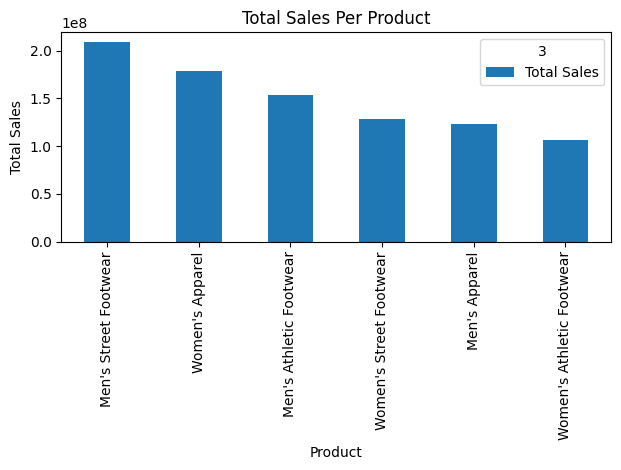

In [13]:
#Plot the Total Product using bar chart
# Set figure size before plotting
plt.figure(figsize=(12, 6))

# Plot bar chart
top_products.plot(kind='bar', title='Total Sales Per Product')

# Show plot
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [14]:
top_retailers = (
    df[['Retailer', 'Total Sales']]
    .groupby('Retailer')
    .sum()
    .sort_values('Total Sales', ascending = False)
)

top_retailers

3,Total Sales
Retailer,
West Gear,242964333.0
Foot Locker,220094720.0
Sports Direct,182470997.0
Kohl's,102114753.0
Amazon,77698912.0
Walmart,74558410.0


C:\Users\Ronel O. Parami\AppData\Local\Temp\ipykernel_11208\1034908629.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  top_retailers.plot(


<Figure size 1200x600 with 0 Axes>

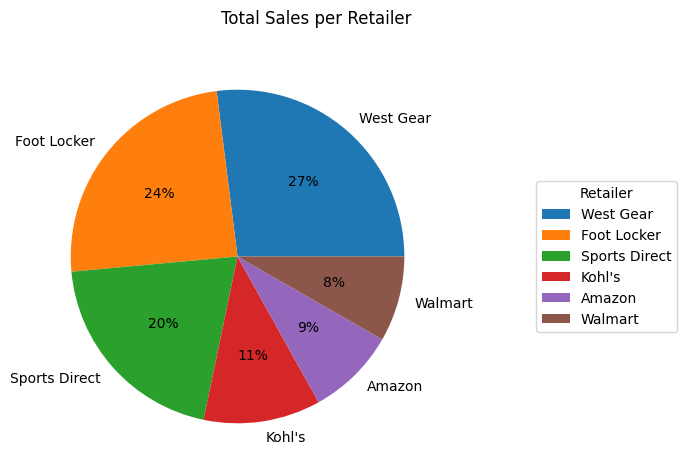

In [15]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot pie chart from the data
top_retailers.plot(
    kind='pie',
    autopct='%1.0f%%',
    ylabel='',  # Remove default y-axis label
    title='Total Sales per Retailer',
    legend=False, # We'll add legend manually
    subplots=True
)

# Add legend to the right
plt.legend(
    labels=top_retailers.index,
    loc='center left',
    bbox_to_anchor=(1.2, 0.5),
    title='Retailer'
)

# Show the plot
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Product Price Distribution'}, ylabel='Frequency'>

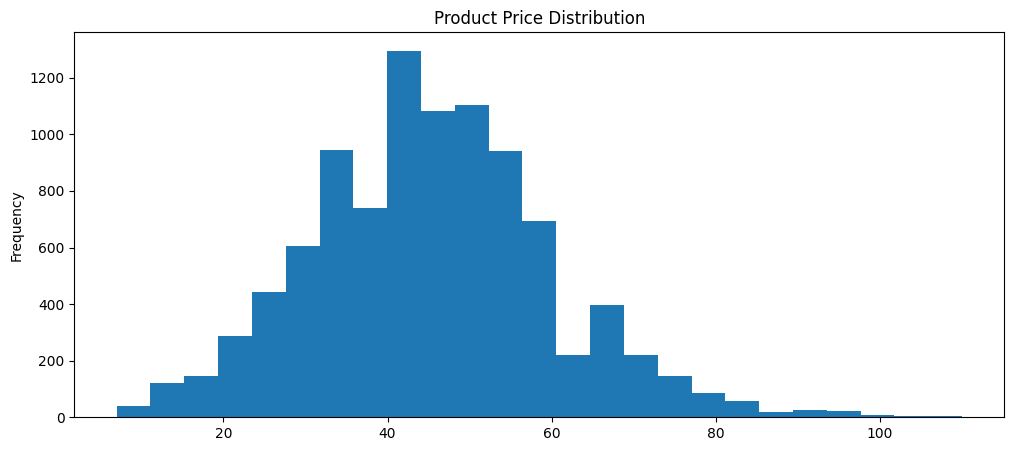

In [16]:
#Analyze the Distibution of the Product price using hist chart
df['Price per Unit'].plot(kind = 'hist', bins=25, figsize=(12,5), title="Product Price Distribution")

In [17]:
#Get the mean of the Price per Unit
df['Price per Unit'].mean()

45.21662520729685

In [18]:
#Top Sales Method
top_sales_method = (df[['Sales Method', 'Total Sales']]
                   .groupby('Sales Method')
                   .sum()
                   .sort_values('Total Sales', ascending = False)              
                   )
top_sales_method

3,Total Sales
Sales Method,
In-store,356643750.0
Outlet,295585493.0
Online,247672882.0


<Axes: title={'center': 'Top Selling Methods'}, ylabel='Sales Method'>

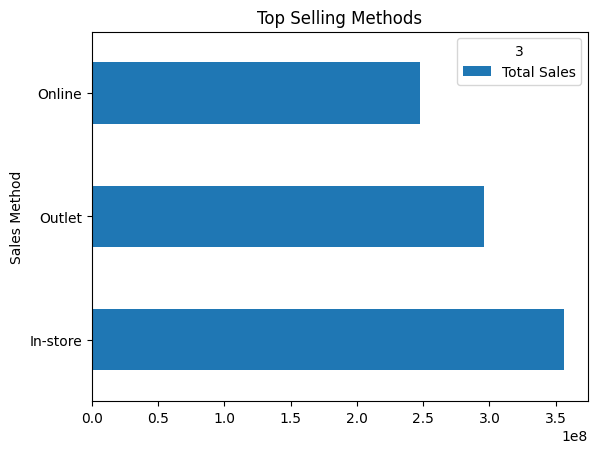

In [19]:
#plot the Sales Method
top_sales_method.plot(kind = 'barh', title = 'Top Selling Methods')